In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

/Users/cholponzhakshylykova/Desktop/SDS/MM0004-falcon-eye/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data importing and initial data exploration

In [3]:
# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /Users/cholponzhakshylykova/.cache/kagglehub/datasets/jainilcoder/online-payment-fraud-detection/versions/1


In [4]:
print(os.listdir(path)) #check the direactory

['onlinefraud.csv']


In [5]:
data = pd.read_csv(os.path.join(path, "onlinefraud.csv"))

In [6]:
print(data.info())
print(data.describe)
print(data.shape)
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...  

In [7]:
data.head(10000)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7,PAYMENT,466.73,C517929856,881.0,414.27,M2128130537,0.0,0.0,0,0
9996,7,PAYMENT,8239.66,C1483641522,11515.0,3275.34,M1108211033,0.0,0.0,0,0
9997,7,PAYMENT,6063.34,C728110179,31409.0,25345.66,M277524255,0.0,0.0,0,0
9998,7,TRANSFER,317806.64,C1021138110,10901.0,0.00,C1935506329,103168.0,0.0,0,0


In [8]:
# check missing values:

if data.isnull().values.any():
    print("There are missing values")
    print(data.isnull().sum())
else:
    print("There are no missing values")


There are no missing values


In [9]:
# dealing with  duplicates: 

duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}") #there ano duplicates in the dataaset


Number of duplicate rows: 0


Unique steps: 743
This is the average step: 243.39724563151657
This is the minimum step: 1
This is the maximum step: 743


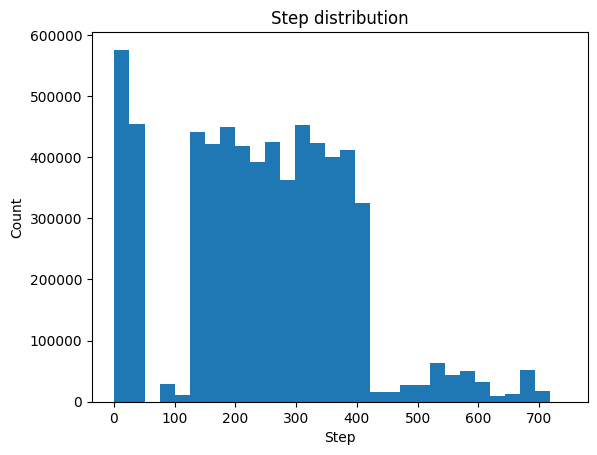

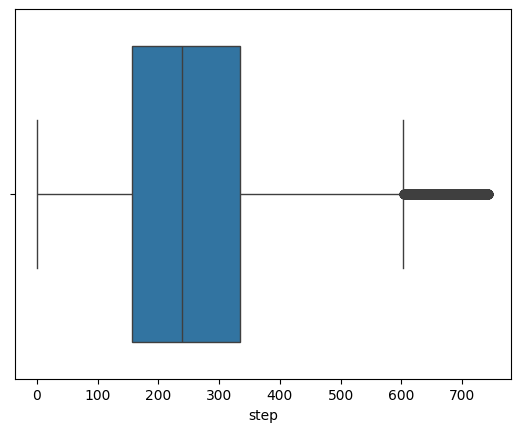

In [10]:
# check the steps 
#Info step is a time of transaction, 1 step = 1 hour

data.head()
len(data)
print(f"Unique steps: {len(data["step"].unique())}") # there are unique 743 steps out of 6362620 data entries, so same steps occuring several time
print(f"This is the average step: {np.mean(data["step"])}")
print(f"This is the minimum step: {np.min(data["step"])}")
print(f"This is the maximum step: {np.max(data["step"])}")

#now plot how many time each step occur:

plt.hist(data["step"], rwidth = 1, bins = 30)
plt.title("Step distribution")
plt.xlabel("Step")
plt.ylabel("Count")
plt.show()


#make a boxplot

sns.boxplot(x=data["step"])
plt.show()



Text(0.5, 1.0, 'Transaction Distribution')

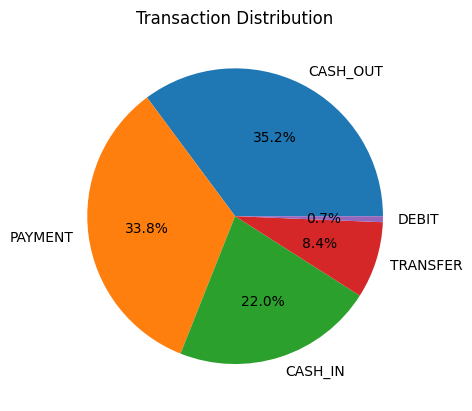

In [11]:
# look into the type of the transaction 

data["type"].unique() # there are 5 types of transaction
plt.pie(data["type"].value_counts(), labels = data["type"].value_counts().index, autopct = '%.1f%%')
plt.title("Transaction Distribution")

Minimum Transaction 0.0
Maximum Transcation 92445517.0
Average Transaction 179862.0


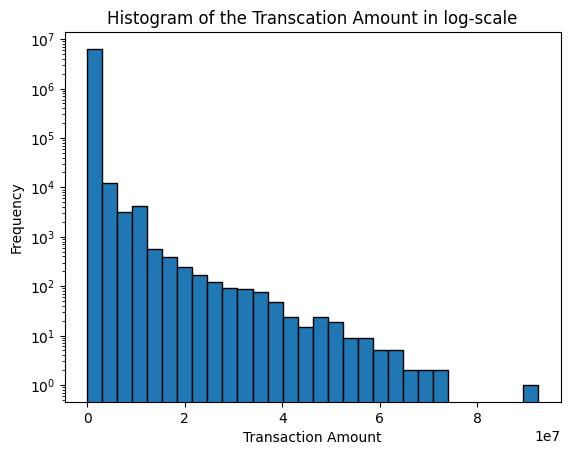

In [12]:
# look into the amount 
print(f"Minimum Transaction {round(np.min(data["amount"]),0)}")
print(f"Maximum Transcation {round(np.max(data["amount"]),0)}")
print(f"Average Transaction {round(np.mean(data["amount"]),0)}")
plt.hist(x = data["amount"], bins = 30, edgecolor = "black", log=True)
plt.title("Histogram of the Transcation Amount in log-scale")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

#sns.boxenplot( x= data["amount"], log_scale=True)

In [16]:
#check duplicates in nameOrig columns
duplicates = data[data["nameOrig"].duplicated(keep=False)]

#check sample duplicate 
duplicates[duplicates["nameOrig"]=="C1859823482"]
#there are some columns which have same nameOrig
#I think it is nothing to worry, probably the same account was doing transaction to differnt other accounts. 

In [22]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


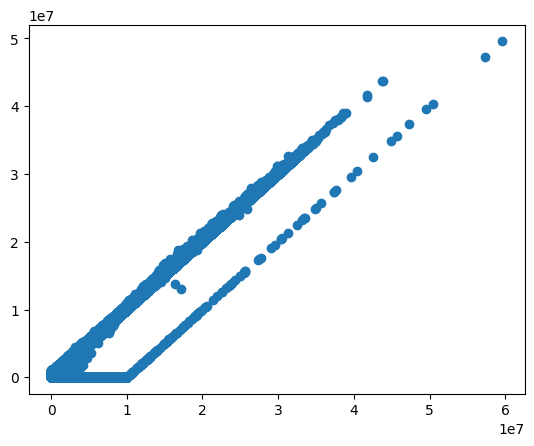

In [26]:
plt.scatter(data["oldbalanceOrg"], data["newbalanceOrig"])

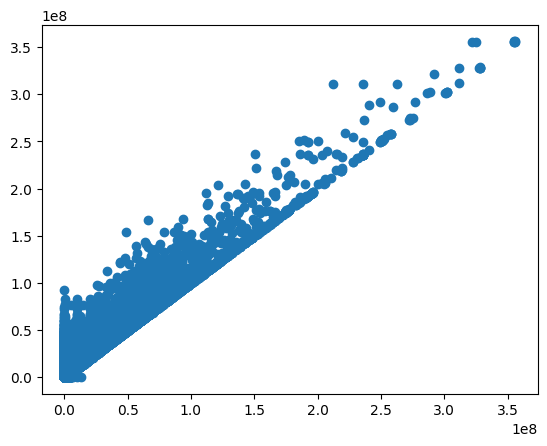

In [27]:
plt.scatter(data["oldbalanceDest"], data["newbalanceDest"])

In [41]:
#check if the isFraud and isFlaggedFraud match together: 

matched_rows = (data["isFraud"] == data["isFlaggedFraud"])
print(f"matched isFraud-isFlaggedFraud: {len(matched_rows)}")


mismatched_rows = data[data["isFraud"] != data["isFlaggedFraud"]]
print(f"mismatches isFraud-isFlaggedFraud: {len(mismatched_rows)}")


#mismatchproportion:
proportion_mismatch = len(mismatched_rows)/(len(mismatched_rows) + len(matched_rows)) * 100 
print(f"Proportion of wrongly labelled: {proportion_mismatch:.2f}%") #so only 0.13% is mismatched across on labels




matched isFraud-isFlaggedFraud: 6362620
mismatches isFraud-isFlaggedFraud: 8197
Proportion of wrongly labelled: 0.13%


In [ ]:
# what proportion of all transaction is fraud? 


# comparison of fraud across all the types of transactions? 

# which names are frequent is fraud? 

